<a href="https://colab.research.google.com/github/jos-k19/CL465-HMM/blob/main/CL_465_HMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import nltk
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import pprint, time
import seaborn as sns
import matplotlib.pyplot as plt
 
#download the treebank corpus from nltk
nltk.download('treebank')
 
#download the universal tagset from nltk
nltk.download('universal_tagset')
 
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))
 
#print the first two sentences along with tags
print(nltk_data[:2])

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')]]


In [ ]:
#print each word with its respective tag for first two sentences
for sent in nltk_data[:2]:
  for tuple in sent:
    print(tuple)

('Pierre', 'NOUN')
('Vinken', 'NOUN')
(',', '.')
('61', 'NUM')
('years', 'NOUN')
('old', 'ADJ')
(',', '.')
('will', 'VERB')
('join', 'VERB')
('the', 'DET')
('board', 'NOUN')
('as', 'ADP')
('a', 'DET')
('nonexecutive', 'ADJ')
('director', 'NOUN')
('Nov.', 'NOUN')
('29', 'NUM')
('.', '.')
('Mr.', 'NOUN')
('Vinken', 'NOUN')
('is', 'VERB')
('chairman', 'NOUN')
('of', 'ADP')
('Elsevier', 'NOUN')
('N.V.', 'NOUN')
(',', '.')
('the', 'DET')
('Dutch', 'NOUN')
('publishing', 'VERB')
('group', 'NOUN')
('.', '.')


In [ ]:
# split data into training and validation set in the ratio 80:20
train_set,test_set =train_test_split(nltk_data,train_size=0.80,test_size=0.20,random_state = 101)

In [ ]:
# create list of train and test tagged words
train_tagged_words = [ tup for sent in train_set for tup in sent ]
test_tagged_words = [ tup for sent in test_set for tup in sent ]
print(len(train_tagged_words))
print(len(test_tagged_words))

80310
20366


In [ ]:
# check some of the tagged words.
train_tagged_words[:5]

[('Drink', 'NOUN'),
 ('Carrier', 'NOUN'),
 ('Competes', 'VERB'),
 ('With', 'ADP'),
 ('Cartons', 'NOUN')]

In [ ]:
#use set datatype to check how many unique tags are present in training data
tags = {tag for word,tag in train_tagged_words}
print(len(tags))
print(tags)
 
# check total words in vocabulary
vocab = {word for word,tag in train_tagged_words}
print(len(vocab))

12
{'.', 'ADV', 'NOUN', 'DET', 'ADJ', 'PRT', 'X', 'ADP', 'NUM', 'CONJ', 'VERB', 'PRON'}
11052


In [ ]:
# compute Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)#total number of times the passed tag occurred in train_bag
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
#now calculate the total number of times the passed word occurred as the passed tag.
    count_w_given_tag = len(w_given_tag_list)
 
     
    return (count_w_given_tag, count_tag)

In [ ]:
# compute  Transition Probability
def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [ ]:
# creating t x t transition matrix of tags, t= no of tags
# Matrix(i, j) represents P(jth tag after the ith tag)
 
tags_matrix = np.zeros((len(tags), len(tags)), dtype='float32')
for i, t1 in enumerate(list(tags)):
    for j, t2 in enumerate(list(tags)): 
      tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [ ]:
# convert the matrix to a df for better readability
#the table is same as the transition table shown in section 3 of article
tags_df = pd.DataFrame(tags_matrix, columns = list(tags), index=list(tags))
display(tags_df)

,.,ADV,NOUN,DET,ADJ,PRT,X,ADP,NUM,CONJ,VERB,PRON
.,0.092372,0.052569,0.218539,0.172192,0.046132,0.002789,0.025641,0.092908,0.078210,0.060079,0.089690,0.068769
ADV,0.139255,0.081458,0.032196,0.071373,0.130721,0.014740,0.022886,0.119472,0.029868,0.006982,0.339022,0.012025
NOUN,0.240094,0.016895,0.262344,0.013106,0.012584,0.043935,0.028825,0.176827,0.009144,0.042454,0.149134,0.004659
DET,0.017393,0.012074,0.635906,0.006037,0.206411,0.000287,0.045134,0.009918,0.022855,0.000431,0.040247,0.003306
ADJ,0.066019,0.005243,0.696893,0.005243,0.063301,0.011456,0.020971,0.080583,0.021748,0.016893,0.011456,0.000194
PRT,0.045010,0.009393,0.250489,0.101370,0.082975,0.001174,0.012133,0.019569,0.056751,0.002348,0.401174,0.017613
X,0.160869,0.025754,0.061695,0.056890,0.017682,0.185086,0.075726,0.142226,0.003075,0.010379,0.206419,0.054200
ADP,0.038724,0.014553,0.323589,0.320931,0.107062,0.001266,0.034548,0.016958,0.063275,0.001012,0.008479,0.069603
NUM,0.119243,0.003570,0.351660,0.003570,0.035345,0.026062,0.202428,0.037487,0.184220,0.014281,0.020707,0.001428
CONJ,0.035126,0.057080,0.349067,0.123491,0.113611,0.004391,0.009330,0.055982,0.040615,0.000549,0.150384,0.060373


In [ ]:

def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
# Let's test our Viterbi algorithm on a few sample sentences of test dataset
random.seed(1234)      #define a random seed to get same sentences when run multiple times
 
# choose random 10 numbers
rndom = [random.randint(1,len(test_set)) for x in range(10)]
 
# list of 10 sents on which we test the model
test_run = [test_set[i] for i in rndom]
 
# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]
 
# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]

In [ ]:

#Here We will only test 10 sentences to check the accuracy
#as testing the whole training set takes huge amount of time
start = time.time()

tagged_seq = Viterbi(test_tagged_words)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
print(len(check))
 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm Accuracy: ',accuracy*100)

Time taken in seconds:  61.856483697891235
196
Viterbi Algorithm Accuracy:  93.77990430622009


In [ ]:
total_c_trb = []
total_c_ts = []
c_trb = 0 
c_ts = 0 
for tag in tags:
  for i in range(len(test_run_base)):
    if test_run_base[i][1] == tag:
      c_trb+=1
  total_c_trb.append(c_trb)
  c_trb = 0

  for i in range(len(tagged_seq)):
    if test_run_base[i][1] == tag and test_run_base[i][1] == tagged_seq[i][1]:
      c_ts+=1
  total_c_ts.append(c_ts)
  c_ts = 0

In [ ]:
print(total_c_ts)

[29, 10, 55, 18, 7, 4, 14, 16, 2, 4, 32, 5]


In [ ]:
print(total_c_trb)

[29, 11, 62, 18, 8, 4, 15, 16, 2, 4, 35, 5]


In [ ]:
accuracy = []

In [ ]:
for i in range(len(tags)): 
  accuracy.append(total_c_ts[i]/total_c_trb[i])

In [ ]:
accuracy

[1.0,
 0.9090909090909091,
 0.8870967741935484,
 1.0,
 0.875,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 0.9142857142857143,
 1.0]

In [ ]:
tagged_seq_tag = []
for word, tag in tagged_seq:
  tagged_seq_tag.append(tag)

test_run_base_tag = []
for word, tag in test_run_base:
  test_run_base_tag.append(tag)

Text(0.5, 1.0, 'Confusion Matrix')

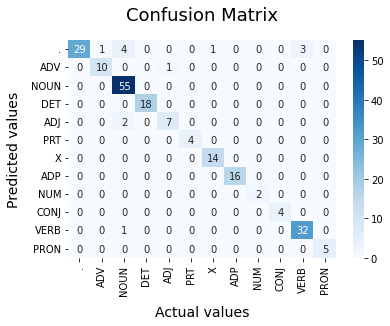

In [ ]:
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(tagged_seq_tag, test_run_base_tag, labels=list(tags))
categories  = list(tags)
# group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = [value for value in cf_matrix.flatten()]

labels = [f'{v1}' for v1 in group_percentages]
labels = np.asarray(labels).reshape(12,12)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)


plt.xlabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Predicted values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


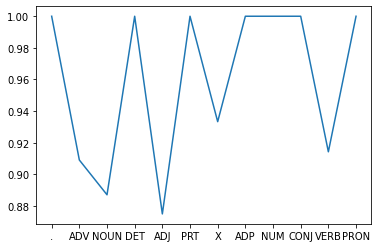

In [ ]:
y = accuracy  # X-axis points
x = list(tags)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.show()  # display

In [ ]:
# #Code to test all the test sentences
# #(takes alot of time to run s0 we wont run it here)
# # tagging the test sentences()
# test_tagged_words = [tup for sent in test_set for tup in sent]
# test_untagged_words = [tup[0] for sent in test_set for tup in sent]
# test_untagged_words
 
# start = time.time()
# tagged_seq = Viterbi(test_untagged_words)
# end = time.time()
# difference = end-start
 
# print("Time taken in seconds: ", difference)
 
# # accuracy
# check = [i for i, j in zip(test_tagged_words, test_untagged_words) if i == j] 
 
# accuracy = len(check)/len(tagged_seq)
# print('Viterbi Algorithm Accuracy: ',accuracy*100)

In [ ]:
#To improve the performance,we specify a rule base tagger for unknown words 
# specify patterns for tagging
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'\*T?\*?-[0-9]+$', 'X'),        # X
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')                   # nouns
]
 
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)

In [ ]:
#modified Viterbi to include rule based tagger in it
def Viterbi_rule_based(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
     
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                 
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
             
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]       
        
         
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] # assign based on rule based tagger
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
             
         
        state.append(state_max)
    return list(zip(words, state))

In [ ]:
#test accuracy on subset of test data 
start = time.time()
tagged_seq = Viterbi_rule_based(test_tagged_words)
end = time.time()
difference = end-start
 
print("Time taken in seconds: ", difference)
 
# accuracy
check = [i for i, j in zip(tagged_seq, test_run_base) if i == j] 
 
accuracy = len(check)/len(tagged_seq)
print('Viterbi Algorithm with rule based tagger Accuracy: ',accuracy*100)

Time taken in seconds:  51.64943075180054
Viterbi Algorithm with rule based tagger Accuracy:  97.1291866028708


In [ ]:
total_c_trb = []
total_c_ts = []
c_trb = 0 
c_ts = 0 
for tag in tags:
  for i in range(len(test_run_base)):
    if test_run_base[i][1] == tag:
      c_trb+=1
  total_c_trb.append(c_trb)
  c_trb = 0

  for i in range(len(tagged_seq)):
    if test_run_base[i][1] == tag and test_run_base[i][1] == tagged_seq[i][1]:
      c_ts+=1
  total_c_ts.append(c_ts)
  c_ts = 0

In [ ]:
print(total_c_ts)

[29, 10, 59, 18, 7, 4, 15, 16, 2, 4, 34, 5]


In [ ]:
print(total_c_trb)

[29, 11, 62, 18, 8, 4, 15, 16, 2, 4, 35, 5]


In [ ]:
accuracy = []
for i in range(len(tags)): 
  accuracy.append(total_c_ts[i]/total_c_trb[i])

In [ ]:
accuracy

[1.0,
 0.9090909090909091,
 0.9516129032258065,
 1.0,
 0.875,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9714285714285714,
 1.0]

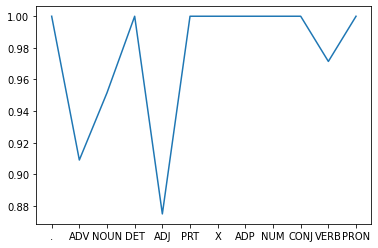

In [ ]:
y = accuracy  # X-axis points
x = list(tags)  # Y-axis points
  
plt.plot(x, y)  # Plot the chart
plt.show()  # display

In [ ]:
tagged_seq_tag = []
for word, tag in tagged_seq:
  tagged_seq_tag.append(tag)

test_run_base_tag = []
for word, tag in  test_run_base:
  test_run_base_tag.append(tag)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tagged_seq_tag, test_run_base_tag, labels=list(tags))

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 59,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5]])

Text(0.5, 1.0, 'Confusion Matrix')

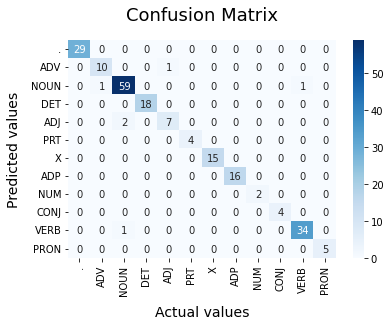

In [ ]:
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(tagged_seq_tag, test_run_base_tag, labels=list(tags))
categories  = list(tags)
# group_names = ['True Neg','False Pos', 'False Neg','True Pos']
group_percentages = [value for value in cf_matrix.flatten()]

labels = [f'{v1}' for v1 in group_percentages]
labels = np.asarray(labels).reshape(12,12)

sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

plt.xlabel("Actual values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Predicted values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [ ]:
#Check how a sentence is tagged by the two POS taggers
#and compare them
test_sent="Will can see Marry"
pred_tags_rule=Viterbi_rule_based(test_sent.split())
pred_tags_withoutRules= Viterbi(test_sent.split())
print(pred_tags_rule)
print(pred_tags_withoutRules)
#Will and Marry are tagged as NUM as they are unknown words for Viterbi Algorithm 

[('Will', 'NOUN'), ('can', 'VERB'), ('see', 'VERB'), ('Marry', 'NOUN')]
[('Will', '.'), ('can', 'VERB'), ('see', 'VERB'), ('Marry', '.')]
